In [1]:
#DATA COLLECTION AND INPUT

import pandas as pd
# Reading the data into a variable.
dataset = pd.read_csv(r'C:\Users\hp\Desktop\Lambton-subjects-new-data\Big_data\CBD-2214_5-GroupAssignment1\LifeExpectancyData.csv')
# Print the first few(default - 5) values of the data.
print('Head: \n', dataset.head())

Head: 
        Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infantdeaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0            62     0.01               71.279624         65.0      1154  ...   
1            64     0.01               73.523582         62.0       492  ...   
2            66     0.01               73.219243         64.0       430  ...   
3            69     0.01               78.184215         67.0      2787  ...   
4            71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    

In [2]:

# Print the information about the data(data-types and objects)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infantdeaths                     2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  underfivedeaths                  2938 non-null   int64  
 12  Polio               

In [3]:


# Print the outline of data(count, mean, min, max,etc) rounding to 3 decimal places.
print('Describe: \n', round(dataset.describe(), 3))

Describe: 
            Year  Life expectancy   Adult Mortality  infantdeaths   Alcohol  \
count  2938.000          2928.000         2928.000      2938.000  2744.000   
mean   2007.519            69.225          164.796        30.304     4.603   
std       4.614             9.524          124.292       117.927     4.052   
min    2000.000            36.300            1.000         0.000     0.010   
25%    2004.000            63.100           74.000         0.000     0.878   
50%    2008.000            72.100          144.000         3.000     3.755   
75%    2012.000            75.700          228.000        22.000     7.703   
max    2015.000            89.000          723.000      1800.000    17.870   

       percentage expenditure  Hepatitis B    Measles       BMI   \
count                2938.000      2385.00    2938.000  2904.000   
mean                  738.251        80.94    2419.592    38.321   
std                  1987.915        25.07   11467.272    20.044   
min          

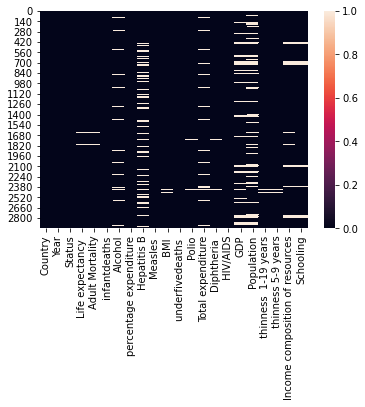

Country                              0
Year                                 0
Status                               0
infantdeaths                         0
percentage expenditure               0
Measles                              0
 HIV/AIDS                            0
underfivedeaths                      0
Life expectancy                      6
Adult Mortality                      6
Polio                                8
Diphtheria                           8
 thinness 5-9 years                 20
 thinness  1-19 years               20
 BMI                                20
Schooling                          135
Income composition of resources    138
Alcohol                            174
Total expenditure                  189
GDP                                411
Hepatitis B                        524
Population                         623
dtype: int64

In [4]:
#DATA PRE-PROCESSING

#For visualization,Matplot --> For basic visualization,seaborn --> includes variety of visulaization features(like heat map)
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting graph showing null elements
sns.heatmap(pd.isna(dataset))
plt.show()

# Return the non-redundant value from the set for the feature Year.
dataset['Year'].unique()

# Dropping the NaN or empty values, only those rows with minimum 17 not null value column are retained.
dataset = dataset.dropna(thresh=17)
dataset.isna().sum().sort_values()

In [5]:


# Data correlation
corr_data = dataset.corr()
print('Correlation: \n', corr_data)

Correlation: 
                                      Year  Life expectancy   Adult Mortality  \
Year                             1.000000          0.166597        -0.076483   
Life expectancy                  0.166597          1.000000        -0.692133   
Adult Mortality                 -0.076483         -0.692133         1.000000   
infantdeaths                    -0.038026         -0.197233         0.077995   
Alcohol                         -0.054092          0.399243        -0.190360   
percentage expenditure           0.032448          0.382520        -0.241490   
Hepatitis B                      0.101977          0.256707        -0.162498   
Measles                         -0.082701         -0.159542         0.031110   
 BMI                             0.104625          0.564441        -0.383663   
underfivedeaths                 -0.043340         -0.222797         0.092965   
Polio                            0.089882          0.456665        -0.266973   
Total expenditure        

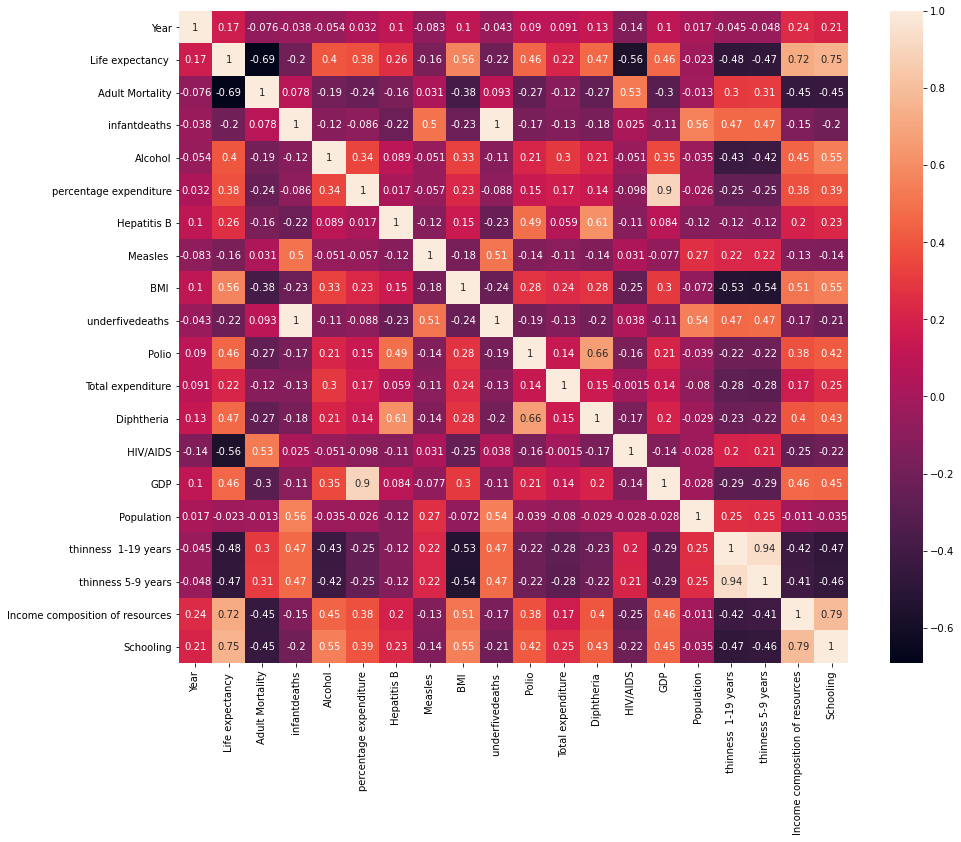

In [6]:


# Plot the correlation graph
plt.figure(figsize=(15, 12))
sns.heatmap(corr_data, annot=True)
plt.show()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infantdeaths                       0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
underfivedeaths                    0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


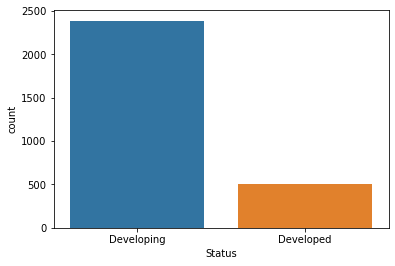

In [7]:

# Function for filling missing values.
def fill_mean(feature_name, data=dataset):
    data[feature_name].fillna(data[feature_name].mean(), inplace=True)


# Filling the null values with average value of column
features_miss = dataset.columns[dataset.isna().any()]
for feature in features_miss:
    fill_mean(feature_name=feature)

print(dataset.isnull().sum())

# Graph
sns.countplot(x='Status', data=dataset)
plt.show()

In [8]:

# Average Life expectancy of different Status.
df_status = dataset.groupby('Status')
for sta,life in df_status:
    print(sta + ":" + str(life['Life expectancy '].mean()))

Developed:79.1944990176817
Developing:67.26434789825997


In [9]:


#Print longest and shortest life expectany in top 10 countries

print('Top 10 developed countries with the longest life expectancy')
status_data = dataset[dataset.Status == 'Developed'].groupby('Country')
print(status_data['Life expectancy '].mean().sort_values(ascending=False).head(10))
print('*' * 50)
print('Top 10 countries with the longest life expectancy')
data_count = dataset.groupby('Country')
print(data_count['Life expectancy '].mean().sort_values(ascending=False).head(10))
print('*' * 50)
print('Top 10 countries with the shortest life expectancy')
print(data_count['Life expectancy '].mean().sort_values(ascending=False).tail(10))
print('*' * 50)

Top 10 developed countries with the longest life expectancy
Country
Japan          82.53750
Sweden         82.51875
Iceland        82.44375
Switzerland    82.33125
Italy          82.18750
Spain          82.06875
Australia      81.81250
Norway         81.79375
Austria        81.48125
Singapore      81.47500
Name: Life expectancy , dtype: float64
**************************************************
Top 10 countries with the longest life expectancy
Country
Japan          82.53750
Sweden         82.51875
Iceland        82.44375
Switzerland    82.33125
France         82.21875
Italy          82.18750
Spain          82.06875
Australia      81.81250
Norway         81.79375
Canada         81.68750
Name: Life expectancy , dtype: float64
**************************************************
Top 10 countries with the shortest life expectancy
Country
Nigeria                     51.356250
Swaziland                   51.325000
Zimbabwe                    50.487500
Chad                        50.387500
Côt

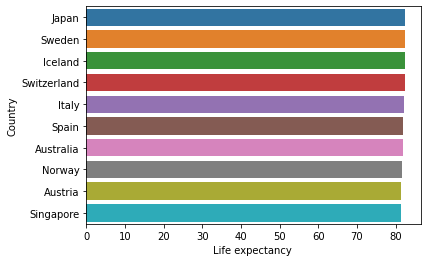

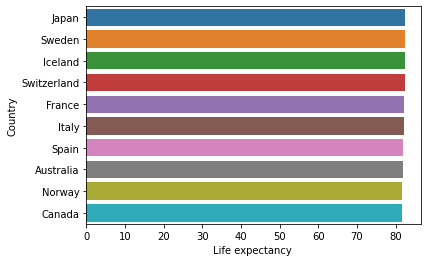

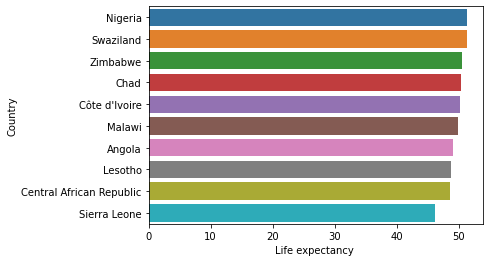

In [10]:

# Plotting the graph for longest and shortest Life expectancy in top 10 countries.

data_ed = status_data['Life expectancy '].mean().sort_values(ascending=False).head(10)
data_display = {'Country': data_ed.index, 'Life expectancy ': data_ed.values}
data_ed = pd.DataFrame(data_display)
data_long = data_count['Life expectancy '].mean().sort_values(ascending=False).head(10)
data_display = {'Country': data_long.index, 'Life expectancy ': data_long.values}
data_long = pd.DataFrame(data_display)
data_short = data_count['Life expectancy '].mean().sort_values(ascending=False).tail(10)
data_display = {'Country': data_short.index, 'Life expectancy ': data_short.values}
data_short = pd.DataFrame(data_display)
for df in [data_ed, data_long, data_short]:
    sns.barplot(x='Life expectancy ', y='Country', data=df)
    plt.show()

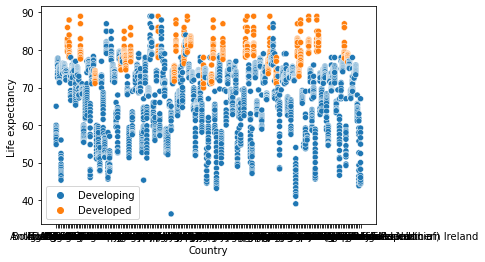

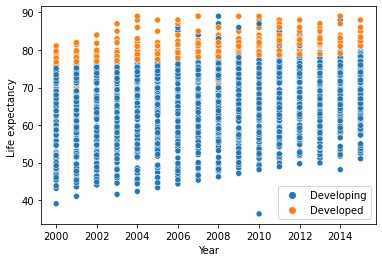

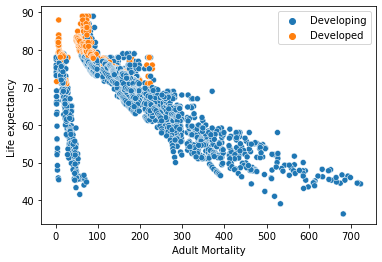

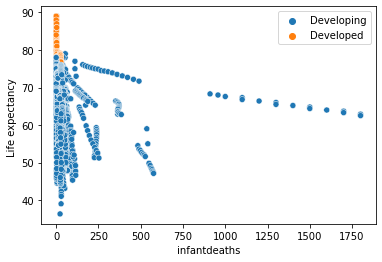

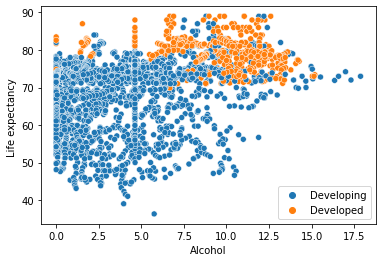

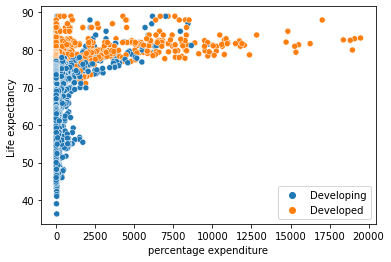

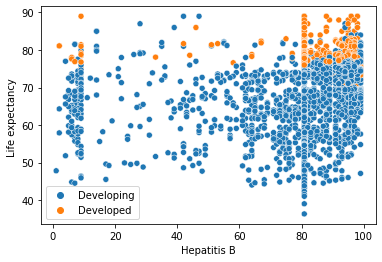

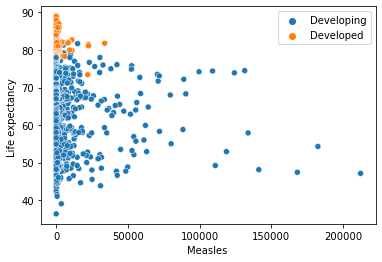

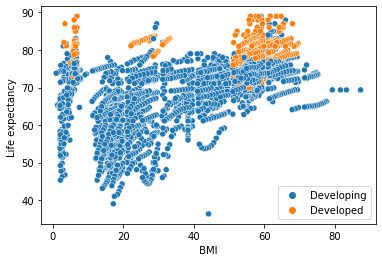

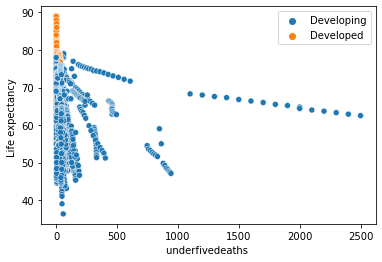

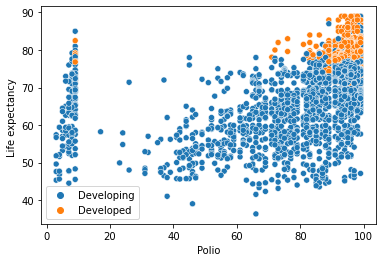

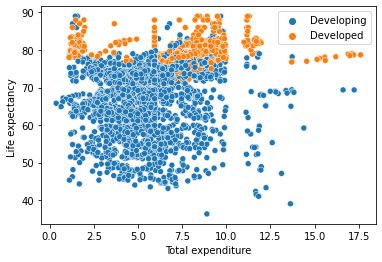

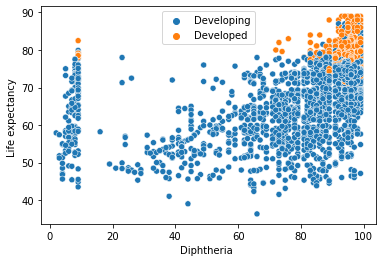

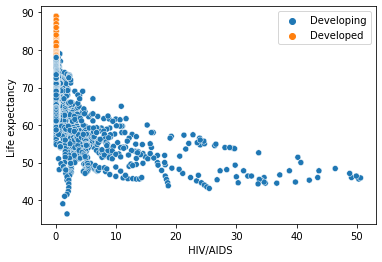

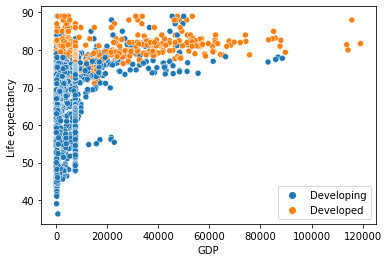

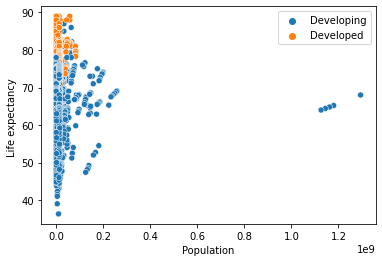

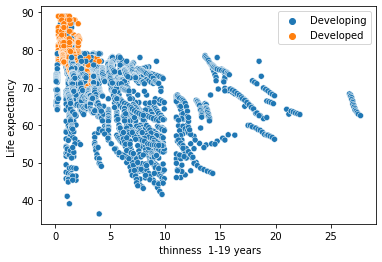

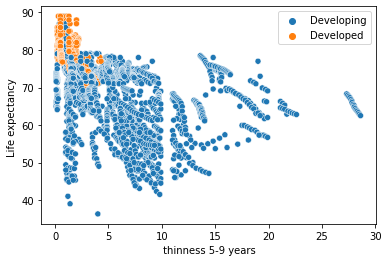

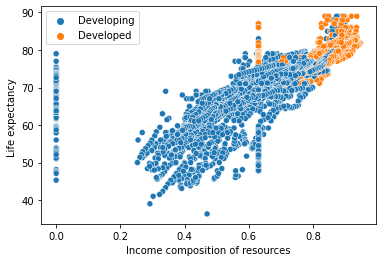

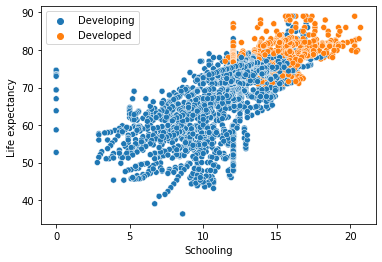

In [11]:

y = dataset['Life expectancy ']
# Setting Life Expectancy as the recurring y-axis for graph plotting.
X = dataset.drop('Life expectancy ', axis=1)
X.head()

# Dividing data by the Developing and Developed statuses.
for features in X.columns:
    if features == 'Status':
        pass
    else:
        sns.scatterplot(x=X[features], y=y, hue=X['Status'])
        plt.legend()
        plt.show()

In [12]:

from sklearn.preprocessing import LabelEncoder

# Converting parameters into numerical values for calculations
le = LabelEncoder()
X['Country'] = le.fit_transform(X['Country'])

status_dum = pd.get_dummies(X['Status'])
X.drop(columns='Status', inplace=True)
# X.head(3)
X = pd.concat([X, status_dum], axis=1)
X.head(3)

Country  Year  Adult Mortality  infantdeaths  Alcohol  \
0        0  2015            263.0            62     0.01   
1        0  2014            271.0            64     0.01   
2        0  2013            268.0            66     0.01   

   percentage expenditure  Hepatitis B  Measles    BMI   underfivedeaths   \
0               71.279624         65.0      1154   19.1                83   
1               73.523582         62.0       492   18.6                86   
2               73.219243         64.0       430   18.1                89   

   ...  Diphtheria    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0  ...         65.0        0.1  584.259210  33736494.0                   17.2   
1  ...         62.0        0.1  612.696514    327582.0                   17.5   
2  ...         64.0        0.1  631.744976  31731688.0                   17.7   

    thinness 5-9 years  Income composition of resources  Schooling  Developed  \
0                 17.3                            0.479       10.1          0   
1                 17.5                            0.476       10.0          0   
2                 17.7                            0.470        9.9          0   

   Developing  
0           1  
1           1  
2           1  

[3 rows x 22 columns]

In [13]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Training and Testing of Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

forest = RandomForestRegressor()
linear = LinearRegression()

forest.fit(X_train, y_train)
linear.fit(X_train, y_train)

# Print Score from test data.
print('Random Forest Regressor score is' , forest.score(X_test,y_test) * 100)
print('Linear regression score is:', linear.score(X_test, y_test) * 100)

y_predict_forest = np.array(forest.predict(X_test))
y_predict_linear = np.array(linear.predict(X_test))
y_test = np.array(y_test)

Random Forest Regressor score is 96.75564637288309
Linear regression score is: 81.65660021948614


In [14]:

from sklearn.metrics import mean_squared_error

# Print MSE
print('Random Forest Mean Squared error: ', mean_squared_error(y_test,y_predict_forest)**(0.5))
print('Linear Regression Mean Squared error: ', mean_squared_error(y_test,y_predict_linear)**(0.5))

Random Forest Mean Squared error:  1.6998459533437753
Linear Regression Mean Squared error:  4.041898364173546
